In [73]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon
import math

In [66]:
all_data = gpd.read_file("Sidewalks.shp")

In [71]:
all_data.head(3)

,OBJECTID,COMPKEY,COMPTYPE,SEGKEY,DISTANCE,ENDDISTANC,WIDTH,UNITID,UNITTYPE,UNITDESC,...,OVERRIDECO,CURBRAMPHI,CURBRAMPMI,CURBRAMPLO,SRTS_SIDEW,NUM_ATTACH,PRIMARYCRO,MINIMUMVAR,Shape_Leng,geometry
0,1,304622,97,17015,13,298.0,20.5,SDW-11397,SDW,NE 54TH ST BETWEEN 45TH AVE NE AND 46TH AVE NE...,...,,U,U,U,1,1,0.8,0,293.997042,LINESTRING (-122.279465262364 47.6674005439378...
1,2,304701,97,8983,23,241.0,42.5,SDW-12751,SDW,AURORA AVE N BETWEEN N 103RD N ST AND N 104TH ...,...,,Y,U,Y,3,1,1.7,0,217.333110,LINESTRING (-122.3448502510738 47.703664645768...
2,3,304581,97,16872,0,96.0,-23.5,SDW-10759,SDW,NE 45TH ST BETWEEN 47TH AVE NE AND 48TH W AVE ...,...,,Y,U,U,3,3,-2.6,0,95.141059,LINESTRING (-122.2773056637669 47.661224514370...


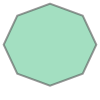

In [81]:
point_coord = [-122.333896, 47.607177]
radius = 0.1 #km

sqrt2 = math.sqrt(2)
conversion_coord = [[1, 0], [1/sqrt2, -1/sqrt2], [0, -1], [-1/sqrt2, -1/sqrt2], [-1, 0], [-1/sqrt2, 1/sqrt2], [0, 1], [1/sqrt2, 1/sqrt2]]

polygon_list = []

for i in range(0, len(conversion_coord)):
    long = point_coord[0] + conversion_coord[i][0] * radius * 180 / (math.pi * 6367 * math.cos(point_coord[1]))
    lat = point_coord[1] + conversion_coord[i][1] * radius * 180 / (math.pi * 6367)
    polygon_list.append([long, lat])
    
point = Polygon(polygon_list)
point

In [82]:
for i in range(0, all_data.UNITID.count()):
    if all_data.geometry[i] is not None:
        if point.intersects(all_data.geometry[i]):
            print(all_data.UNITID[i] + " " + all_data.UNITDESC[i])


SDW-29560 SENECA ST BETWEEN 3RD AVE AND 4TH AVE, NW SIDE
SDW-29557 SENECA ST BETWEEN 4TH AVE AND 5TH AVE, SE SIDE
SDW-31764 4TH AVE BETWEEN MADISON ST AND SPRING ST, SW SIDE
SDW-29559 SENECA ST BETWEEN 3RD AVE AND 4TH AVE, SE SIDE
SDW-29687 SPRING ST BETWEEN 4TH AVE AND 5TH AVE, NW SIDE
SDW-31763 4TH AVE BETWEEN SPRING ST AND SENECA ST, NE SIDE
SDW-31762 4TH AVE BETWEEN SPRING ST AND SENECA ST, SW SIDE
SDW-29558 SENECA ST BETWEEN 4TH AVE AND 5TH AVE, NW SIDE
SDW-31765 4TH AVE BETWEEN MADISON ST AND SPRING ST, NE SIDE
SDW-31760 4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST, SW SIDE
SDW-31761 4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST, NE SIDE
SDW-29688 SPRING ST BETWEEN 3RD AVE AND 4TH AVE, SE SIDE
SDW-29569 SPRING ST BETWEEN 4TH AVE AND 5TH AVE, SE SIDE
SDW-29689 SPRING ST BETWEEN 3RD AVE AND 4TH AVE, NW SIDE
